# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment to train a Multiple Reinforcement Learning agents
### 1. Start the Environment

Start by making sure the necessary packages are installed and Import them

In [ ]:
!pip install unityagents
!pip install mlagents
!pip install gym
!pip install Pillow
!pip install h5py

In [ ]:
%conda install -c pytorch pytorch torchvision

In [1]:
from unityagents import UnityEnvironment
import numpy as np

from collections import deque
import torch
import matplotlib.pyplot as plt
from maddpg_agents import MultiAgent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:

# BUFFER_SIZE = int(1e6)  # replay buffer size
# BATCH_SIZE = 256      # minibatch size
# GAMMA = 0.95            # discount factor
# TAU = 1e-3              # for soft update of target parameters
# WEIGHT_DECAY = 0   # L2 weight decay

In [8]:
multiagent=MultiAgent(state_size, action_size, num_agents, random_seed=0, update_every=10, learn_n_times=5, noise_scale=0.2, noise_decay=0.9999, lr_actor = 5e-4, lr_critic = 5e-4    )



In [9]:
def maddpg(episodes=2000, max_t=1000, break_on_complete=False):

    solved=False
    score_hist = np.array([])
    score_deque = deque(maxlen=100)
    best_score=0
    
    
    for episode in range(episodes): 
        # Reset the enviroment
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        
    
    
    
        for i in range(max_t):
          
            # Predict the best action for the current state. 
            actions = multiagent.act(states, add_noise = True)
            
            # Action is performed and new state, reward, info are received.
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += rewards                                  # update the score (for each agent)
                                   # roll over states to next time step
            
            # current state, action, reward, new state are stored in the experience replay
        
            multiagent.step(states, actions, rewards, next_states, dones)
            
            # roll over new state
            states = next_states                               # roll over states to next time step
    
            if np.any(dones):
                break
        score_hist = np.append(score_hist, scores)
        score_deque.append(np.max(scores))

        if (episode + 1) % 20 ==0:
            print('\rEpisode [{}/{}]\tEpisode Max Score: {:,.2f}\tRunning Average Score: {:,.5}'.format(episode + 1, episodes,np.max(scores), np.mean(score_deque)))
            if np.mean(score_deque) > best_score:
                multiagent.checkpoint()
                best_score=np.mean(score_deque)
                    
        if (np.mean(score_deque)>=0.5) and len(score_deque)>=100 and not solved:
        
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode+1, np.mean(score_deque)))
            solved=True
            if break_on_complete:
                break
    return score_hist


In [39]:

def plot_scores(scores, num_agents, show_scatter=True):
    max_scores=scores.reshape(-1,num_agents).max(axis=1)
    mean_scores=np.convolve(max_scores, np.ones(100), "valid")/100
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(max_scores)-len(mean_scores),len(max_scores)), mean_scores, c='red')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    if show_scatter:
        plt.scatter(x=np.repeat(np.arange(len(max_scores)),num_agents), y=scores, alpha=0.5, marker='.')
    plt.show()

In [11]:
scores_history=maddpg(episodes=2000, max_t=1000, break_on_complete=False)

Episode [20/2000]	Episode Max Score: 0.00	Running Average Score: 0.015
Episode [40/2000]	Episode Max Score: 0.00	Running Average Score: 0.03
Episode [60/2000]	Episode Max Score: 0.00	Running Average Score: 0.0365
Episode [80/2000]	Episode Max Score: 0.00	Running Average Score: 0.039
Episode [100/2000]	Episode Max Score: 0.00	Running Average Score: 0.0399
Episode [120/2000]	Episode Max Score: 0.00	Running Average Score: 0.0435
Episode [140/2000]	Episode Max Score: 0.00	Running Average Score: 0.0422
Episode [160/2000]	Episode Max Score: 0.20	Running Average Score: 0.0432
Episode [180/2000]	Episode Max Score: 0.00	Running Average Score: 0.0434
Episode [200/2000]	Episode Max Score: 0.10	Running Average Score: 0.0467
Episode [220/2000]	Episode Max Score: 0.00	Running Average Score: 0.0451
Episode [240/2000]	Episode Max Score: 0.00	Running Average Score: 0.0384
Episode [260/2000]	Episode Max Score: 0.00	Running Average Score: 0.0275
Episode [280/2000]	Episode Max Score: 0.00	Running Average 

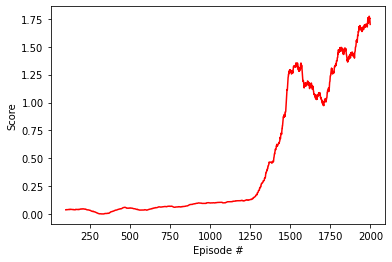

In [41]:
plot_scores(scores_history, num_agents, show_scatter=False)

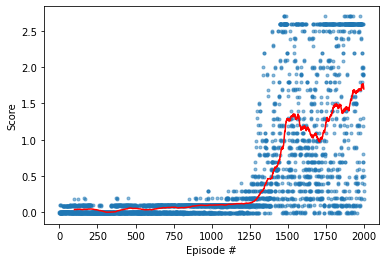

In [40]:
plot_scores(scores_history, num_agents, show_scatter=True)

In [ ]:
### 5. Watch the Trained Agents


Run the cell below to watch the trained agents act

In [15]:
multiagent.load()
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        # Predict the best action for the current state. 
        actions = multiagent.act(states, add_noise = True)
        
        # Action is performed and new state, reward, info are received.
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += rewards                                  # update the score (for each agent)
        
        # roll over new state
        states = next_states                               # roll over states to next time step

        if np.any(dones):
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.30000000447034836
Score (max over agents) from episode 2: 0.800000011920929
Score (max over agents) from episode 3: 1.1000000163912773
Score (max over agents) from episode 4: 0.20000000298023224
Score (max over agents) from episode 5: 1.5000000223517418


In [16]:
env.close()